## Group No 226

## Group Member Names:
1. Chavhan Kalpesh Shantilal 	2020sc04653@wilp.bits-pilani.ac.in
2. Tirth Sarkar 	2020sc04161@wilp.bits-pilani.ac.in
3. Manikandan P 	2020sc04643@wilp.bits-pilani.ac.in




# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?



**Answer**
1. What is the problem that you are trying to solve?

We want to findout quality of telecom service using specific location, provider, data will help trai and telecom provider to take action if quliaty of service is low in specific area.

2. What data do you need to answer the above problem?

We need data provided by user regarding quliaty of service and rating, we will rate quality between 0-5.
TRAI (Telecom Regulatory Authority of India) developed mycall app using which user can provide valuable inputs to trai
we will use same data to determine quliaty of service on specific geolocation and telecom operator

3. What are the different sources of data?
currently TRAI provide these raw data on data.gov.in site we will consume same data to build model.
Site: http://data.gov.in
Department: TRAI (Telecom Regulatory Authority of India)
Data source location :  https://data.gov.in/catalog/voice-call-quality-customer-experience?filters%5Bfield_catalog_reference%5D=3995421&filters%5Bhaving_api%5D=Yes&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc

4. What kind of analytics task are you performing?
We will perform exploritory analysis, data cleansing, outlier removal/replace with median. dropping invalid values in dataset. we also perform label encoding  for categorical columns.


# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves which should be a website which has the required data in it. You have to write Python crawler code to scrape data from the respective website rather than downloading ready-made dataset as such from sources like Kaggle etc. 

(Data downloaded from website like Kaggle will be awarded negative marks.)

### Answer

Data source is obtained from trai, data.gov.in
These data is uploaded by mycall app : https://analytics.trai.gov.in/

Website : https://data.gov.in/catalog/voice-call-quality-customer-experience?filters%5Bfield_catalog_reference%5D=3995421&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc

https://api.data.gov.in/resource/6307dde9-4590-4763-9032-da3c69d06a32?api-key=579b464db66ec23bdd00000171d35b81da0e412852642dd0f0d94fb5&format=xml&offset=0&limit=1000

## 2.1 Code for scraping data from website



In [1]:
import requests
from os.path import exists
import pandas as pd
import json
import numpy as np

def FetchData():
    # Each resource id represent monthly data uploaded by mycall app 
    # add more resource id if required.
    resourceIds = ["07d3496d-8933-4b97-b067-89d8ad7a04eb", "6307dde9-4590-4763-9032-da3c69d06a32"]
    api_key= "579b464db66ec23bdd00000171d35b81da0e412852642dd0f0d94fb5"
    url_prefix="https://api.data.gov.in/resource/"
    url_suffix="&format=json&offset=0&limit=1000"
    
    df = None

    # cache dataset to avoid calling api 
    if(exists("telecomop_cache_data.csv")):
        df =pd.read_csv("telecomop_cache_data.csv")
        df=df.drop("Unnamed: 0", axis=1)
        return df

    for r in resourceIds:
        url = url_prefix+r+"?api-key="+api_key+url_suffix
        #print(url)
        res = requests.get(url)
        #print(res.content)
        jsondata = json.loads(res.text)
        
        if df is None:
            df = pd.DataFrame([r for r in jsondata["records"]])
        else:
            df = pd.concat([df , pd.DataFrame([r for r in jsondata["records"]])])
    
    # -1 are invalid values replace them with NAN treated as missing value.
    df["latitude"].replace(-1.0, np.nan,inplace=True)
    df["longitude"].replace(-1.0, np.nan, inplace=True)
    
    df.to_csv('telecomop_cache_data.csv')
    df =pd.read_csv("telecomop_cache_data.csv")
    df=df.drop("Unnamed: 0", axis=1)
    
    return df

## 2.2 Code for converting the above scraped data into a dataframe

In [2]:
# function return data fram, function will cache dataframe
df = FetchData()

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,10.303162,76.223051,Kerala
1,RJio,Travelling,4G,5,Satisfactory,26.727374,80.898619,Uttar Pradesh
2,RJio,Indoor,4G,4,Satisfactory,NaN,NaN,NaN
3,Idea,Outdoor,4G,2,Poor Voice Quality,12.930553,77.617564,Karnataka
4,MTNL,Indoor,3G,3,Poor Voice Quality,19.155222,72.935275,Maharashtra


In [4]:
df.tail()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
1995,Vodafone,Indoor,4G,3,Call Dropped,NaN,NaN,NaN
1996,Vodafone,Indoor,4G,3,Call Dropped,NaN,NaN,NaN
1997,Vodafone,Indoor,4G,3,Call Dropped,NaN,NaN,NaN
1998,Vodafone,Indoor,4G,3,Satisfactory,NaN,NaN,NaN
1999,Vodafone,Outdoor,2G,5,Satisfactory,NaN,NaN,NaN


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operator           2000 non-null   object 
 1   inout_travelling   2000 non-null   object 
 2   network_type       2000 non-null   object 
 3   rating             2000 non-null   int64  
 4   calldrop_category  2000 non-null   object 
 5   latitude           922 non-null    float64
 6   longitude          922 non-null    float64
 7   state_name         922 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 125.1+ KB


In [6]:
df.describe()

,rating,latitude,longitude
count,2000.000000,922.000000,922.000000
mean,3.753500,20.071962,78.033984
std,1.508932,5.549436,4.850227
min,1.000000,8.568948,70.871155
25%,3.000000,17.632345,73.856595
50%,4.000000,19.070310,76.578064
75%,5.000000,23.468757,80.898747
max,5.000000,31.615309,88.438204


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?


# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [7]:
for c in df.columns.values.tolist():
    uniqval = df[c].unique()
    print("Column ", c, " : ", len(uniqval))


Column  operator  :  6
Column  inout_travelling  :  3
Column  network_type  :  4
Column  rating  :  5
Column  calldrop_category  :  3
Column  latitude  :  493
Column  longitude  :  487
Column  state_name  :  20


In [8]:
Cat_attrib=["operator", "inout_travelling","network_type","calldrop_category", "rating", "state_name"]

for c in Cat_attrib:
    uniqval = df[c].unique()
    print("Column ", c, " : ", uniqval)

Column  operator  :  ['RJio' 'Idea' 'MTNL' 'Airtel' 'Vodafone' 'BSNL']
Column  inout_travelling  :  ['Indoor' 'Travelling' 'Outdoor']
Column  network_type  :  ['4G' '3G' 'Unknown' '2G']
Column  calldrop_category  :  ['Satisfactory' 'Poor Voice Quality' 'Call Dropped']
Column  rating  :  [4 5 2 3 1]
Column  state_name  :  ['Kerala' 'Uttar Pradesh' nan 'Karnataka' 'Maharashtra' 'Rajasthan'
 'Telangana' 'West Bengal' 'Haryana' 'Andhra Pradesh' 'Jharkhand'
 'Madhya Pradesh' 'Odisha' 'Chhattisgarh' 'Tamil Nadu' 'Gujarat' 'Punjab'
 'Delhi' 'Uttarakhand' 'Himachal Pradesh']


## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [9]:
oldsize = len(df)
df2 = df.drop_duplicates()
newsize = len(df2)

msg = ""
if oldsize == newsize :
    msg = "Duplicate not exists"
else:
    msg = "Duplicate exists, Dropping duplicate records. No. of duplicate rows = {}".format((oldsize - newsize))

df =df2
print(msg)

Duplicate exists, Dropping duplicate records. No. of duplicate rows = 1268


## 3.3 Show whether there are any missing values in each attribute. Report the same.


In [10]:
# Invalid values should be replace with NaN i.e. these are missing values 
count = df2.isna().sum().sum() + df2.isnull().sum().sum() 
if count > 0 :
    print("dataset has missing values, Missing values Count = ", count)
else:
    print("No Missing value in data")

dataset has missing values, Missing values Count =  780


## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [11]:
# Replace missing value with median for Continuous attribute
# Replace missing value with most frequent for Categorical attribute

df_org=df.copy()

def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
    most_frequent_category=DataFrame[ColName].mode()[0]
    # replace nan values with most occured category
    DataFrame[ColName].fillna(most_frequent_category,inplace=True)
    
def impute_nan_most_frequent(DataFrame,ColName):
    # .mode()[0] - gives first category name
    mean=DataFrame[ColName].median()
    # replace nan values with most occured category
    DataFrame[ColName].fillna(mean,inplace=True)

for c in df.columns.values.tolist():
    if c in Cat_attrib:
        impute_nan_most_frequent_category(df, c)
    else:
        impute_nan_most_frequent(df,c)
        
df        

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,10.303162,76.223051,Kerala
1,RJio,Travelling,4G,5,Satisfactory,26.727374,80.898619,Uttar Pradesh
2,RJio,Indoor,4G,4,Satisfactory,19.070310,76.920566,Maharashtra
3,Idea,Outdoor,4G,2,Poor Voice Quality,12.930553,77.617564,Karnataka
4,MTNL,Indoor,3G,3,Poor Voice Quality,19.155222,72.935275,Maharashtra
...,...,...,...,...,...,...,...,...
1976,BSNL,Outdoor,4G,1,Call Dropped,19.070310,76.920566,Maharashtra
1982,RJio,Indoor,4G,5,Satisfactory,28.556127,77.177927,Delhi
1984,MTNL,Indoor,4G,2,Poor Voice Quality,19.154314,72.942550,Maharashtra
1985,MTNL,Indoor,4G,1,Call Dropped,19.157258,72.936449,Maharashtra


## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [12]:
# Checking catogorical values format

Cat_attrib=["operator", "inout_travelling","network_type","calldrop_category", "rating", "state_name"]

for c in Cat_attrib:
    uniqval = df[c].unique()
    print("Column ", c, " : ", uniqval)

Column  operator  :  ['RJio' 'Idea' 'MTNL' 'Airtel' 'Vodafone' 'BSNL']
Column  inout_travelling  :  ['Indoor' 'Travelling' 'Outdoor']
Column  network_type  :  ['4G' '3G' 'Unknown' '2G']
Column  calldrop_category  :  ['Satisfactory' 'Poor Voice Quality' 'Call Dropped']
Column  rating  :  [4 5 2 3 1]
Column  state_name  :  ['Kerala' 'Uttar Pradesh' 'Maharashtra' 'Karnataka' 'Rajasthan'
 'Telangana' 'West Bengal' 'Haryana' 'Andhra Pradesh' 'Jharkhand'
 'Madhya Pradesh' 'Odisha' 'Chhattisgarh' 'Tamil Nadu' 'Gujarat' 'Punjab'
 'Delhi' 'Uttarakhand' 'Himachal Pradesh']


Conclusion :`network_type` attribute has invalid value (`Unknown`) need to replace with most frequent value since it is catogorical attribute.

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [13]:
# We will replace invalid value with most frequest item for categorical feature
df["network_type"].replace("Unknown", df["network_type"].mode()[0])

# Replaceing Outlier with median
# -------------------------------
# Outlier replacement
# -------------------------------
def ReplaceOutlierWithMedian(df, col):

    mean = df[col].median()

    Q3 = np.quantile(df[col], 0.75)
    Q1 = np.quantile(df[col], 0.25)
    IQR = Q3 - Q1

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    df[col] = np.where((df[col] > upper_range) | (df[col] < lower_range) ,mean, df[col])

    return df

df = ReplaceOutlierWithMedian(df, ["longitude","latitude"])

df

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,10.303162,76.223051,Kerala
1,RJio,Travelling,4G,5,Satisfactory,26.727374,80.898619,Uttar Pradesh
2,RJio,Indoor,4G,4,Satisfactory,19.070310,76.920566,Maharashtra
3,Idea,Outdoor,4G,2,Poor Voice Quality,12.930553,77.617564,Karnataka
4,MTNL,Indoor,3G,3,Poor Voice Quality,19.155222,72.935275,Maharashtra
...,...,...,...,...,...,...,...,...
1976,BSNL,Outdoor,4G,1,Call Dropped,19.070310,76.920566,Maharashtra
1982,RJio,Indoor,4G,5,Satisfactory,28.556127,77.177927,Delhi
1984,MTNL,Indoor,4G,2,Poor Voice Quality,19.154314,72.942550,Maharashtra
1985,MTNL,Indoor,4G,1,Call Dropped,19.157258,72.936449,Maharashtra


## 3.7 Identify the target variables.


#### Rating is target variable we have to findout network quliaty in speicifc area.

`Target variable` : `Rating`

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [14]:
df_X = df.drop(['rating'], axis=1)
df_Y = df['rating']

## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [15]:
# Peform lable encoding i.e. assign id to catogorical columns

for col in Cat_attrib:
    df[col] =df[col].astype('category').cat.codes
    df[col] = pd.Categorical(df[col])

df_X = df.drop(['rating'], axis=1)
df_Y = df['rating']

In [16]:
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,4,0,2,3,2,10.303162,76.223051,8
1,4,2,2,4,2,26.727374,80.898619,16
2,4,0,2,3,2,19.070310,76.920566,10
3,2,1,2,1,1,12.930553,77.617564,7
4,3,0,1,2,1,19.155222,72.935275,10


# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

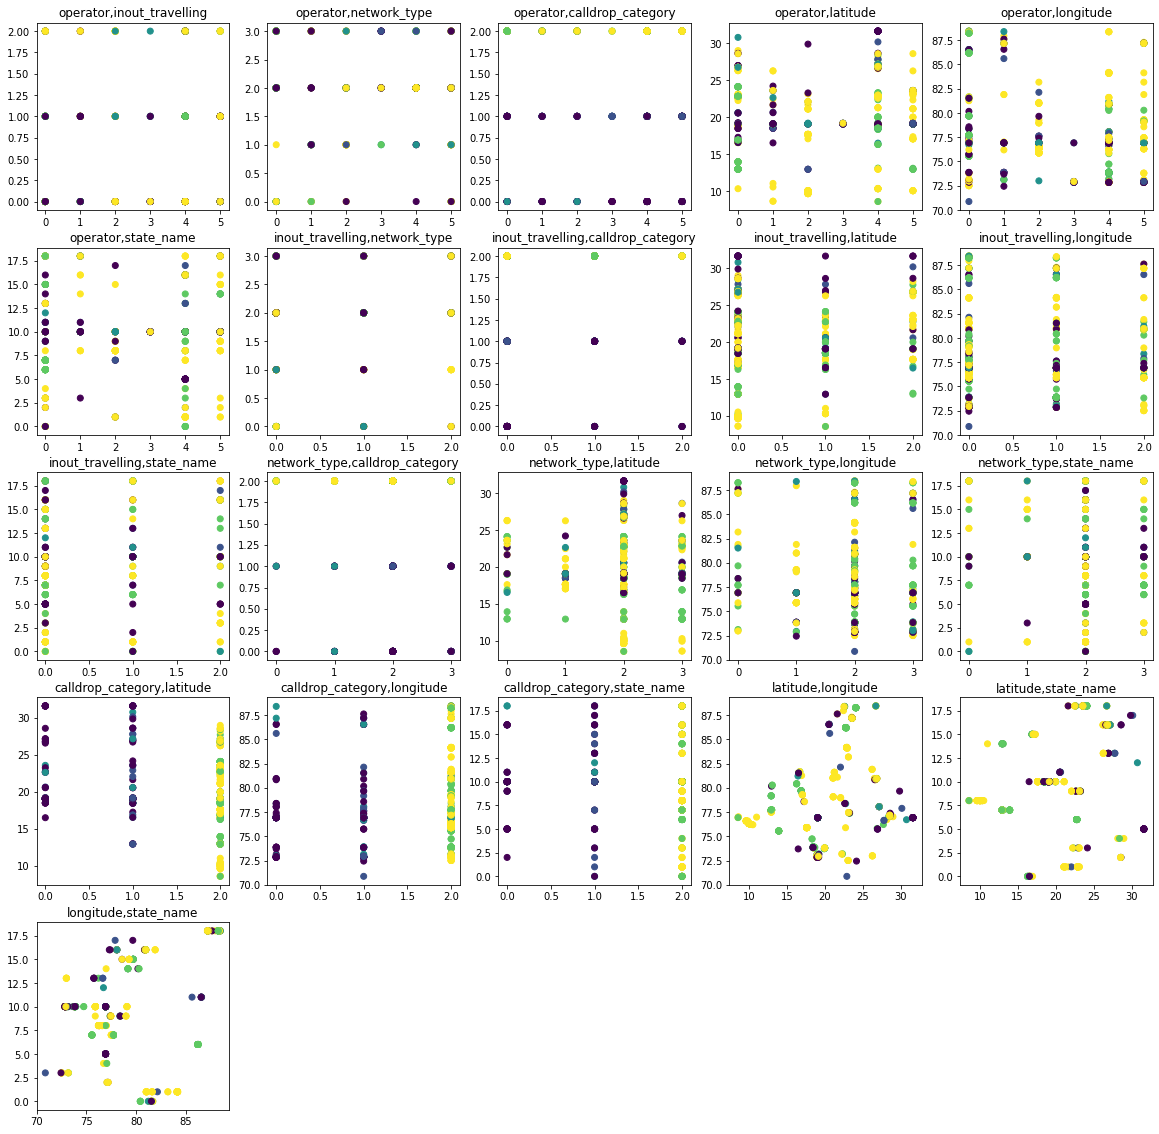

In [17]:
# importing required library
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

pair_order_list = itertools.combinations(df_X.columns.values.tolist(),2)
s=len(df_X.columns.values.tolist())


colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

#fig, axs = plt.subplots(10, 10, figsize=(4, 4), constrained_layout=True)
index=0
fig= plt.figure(figsize=(20,20))
for comb in pair_order_list:
    a,b=comb
    g = plt.subplot2grid((5,5), (int(index/5),int(index%5)))
    g.scatter(x=df_X[a], y=df_X[b], c=df_Y)
    index=index+1
    g.set_title("{},{}".format(a,b))


plt.show()



## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


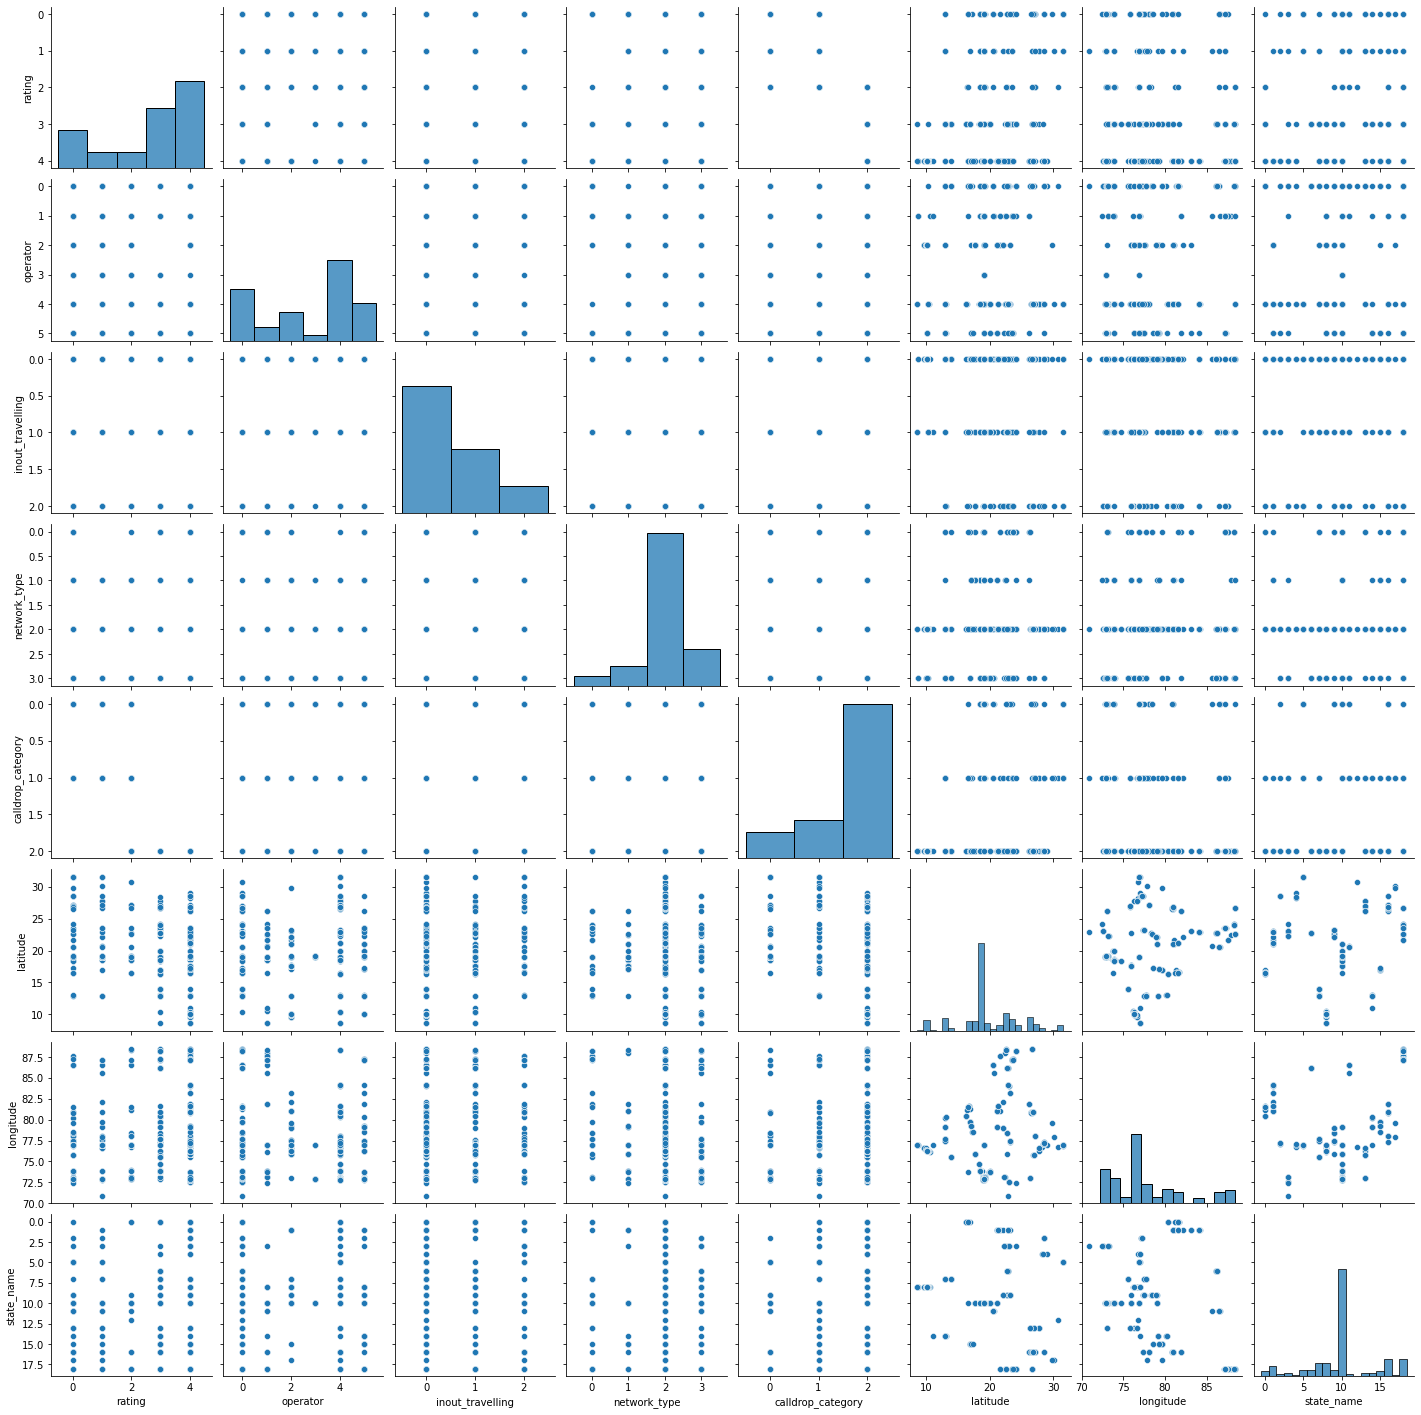

In [18]:

sns.pairplot(df, vars=["rating", "operator", "inout_travelling", "network_type", "calldrop_category", "latitude", "longitude", "state_name"])
plt.show()


## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


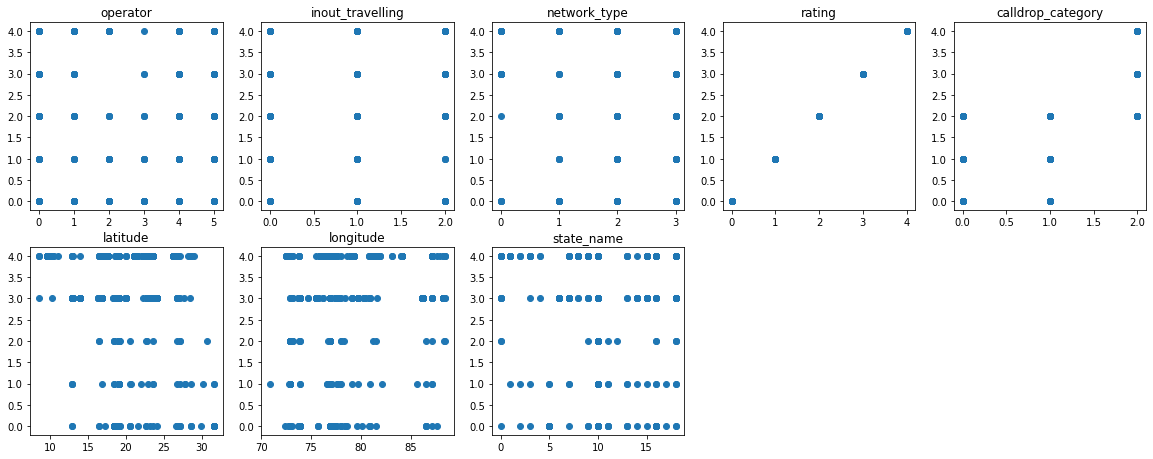

In [19]:
pair_order_list = itertools.combinations(df.columns.values.tolist(),2)

index=0
fig= plt.figure(figsize=(20,20))
for c in df.columns.values.tolist():
    g = plt.subplot2grid((5,5), (int(index/5),int(index%5)))
    g.scatter(x=df[c], y=df["rating"])
    index=index+1
    g.set_title("{}".format(c))


plt.show()

## 4.4 Can any other plot help to identify the optimal set of attributes that can be used for classification. The plot will be based on linear or nonlinear separations. If there is/are such plots, name them, explain why you think they can be helpful in the task and perform the plot as well.


In [20]:
# Not required.


# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

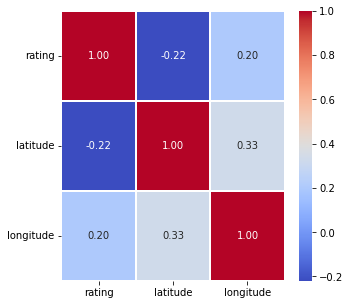

In [21]:
f, ax = plt.subplots(figsize=(5, 2))

dftmp = df_org.copy()
cols = df_org.columns

corr = df_org.corr(method='pearson')
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.15)
f.subplots_adjust(top=2)
plt.show()

All attributes are significant since there are no two feature has correlation < .05

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>three</b>) 

Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

-------------------------------
Gini index
operator =  0.3727961645530467
inout_travelling =  0.6495455419172365
network_type =  0.1485339289129921
calldrop_category =  0.19800263802524967
latitude =  0.12657489440722608
longitude =  0.029996737429017997
state_name =  0.22132330898247055


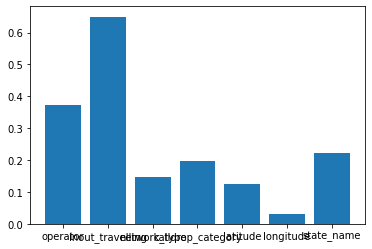

In [22]:
from typing import List
from itertools import combinations

import numpy as np

def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

print("-------------------------------")
print("Gini index")
gvalue = []
for c in df_X.columns.values.tolist():
    gi = gini_coefficient(pd.to_numeric(df_X[c], errors='coerce'))
    print("{} =  {}".format(c, gi ))
    gvalue.append(gi)

plt.bar(df_X.columns.values.tolist(), gvalue )
#plt.xlabel(df_X.columns.values.tolist())
plt.show()

##### Observation

Gini index of **operator, inout_travelling, state_name, calldrop_category, network_type** close to .5 and considered as significant and well distributed compare to other feature.

**Information gain**

[0.13575889 0.02931998 0.04419526 0.56299163 0.58745035 0.56447297
 0.23468611]


<BarContainer object of 7 artists>

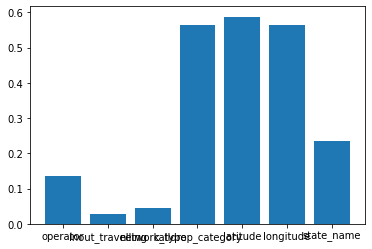

In [23]:

import numpy as np
from sklearn.feature_selection import mutual_info_classif

arr = mutual_info_classif(df_X, df_Y)
print(arr)

plt.bar(df_X.columns.values.tolist(), arr )

**operator, call_dropcategory, longitude, latitude and sate_name** has higher information gain and consider to more significant than other feature.

**Chi Square Test**

In [24]:
from sklearn.feature_selection import SelectKBest, chi2

XX = df_X.astype(int)
YY = df_Y.astype(int)
chi_scores = chi2(XX, YY)
chi_scores


(array([ 30.83579075,   9.37376718,   2.55834266, 181.79834969,
         42.11398567,   9.91682238,   6.21451415]),
 array([3.30682033e-06, 5.24066812e-02, 6.34219985e-01, 3.06409035e-38,
        1.57983055e-08, 4.18523503e-02, 1.83690749e-01]))

<AxesSubplot:>

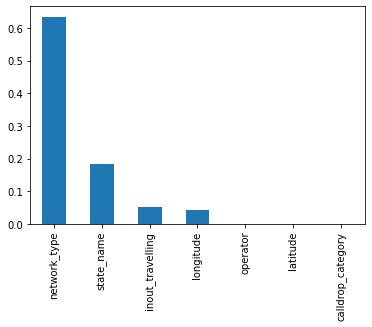

In [25]:
p_values = pd.Series(chi_scores[1],index = XX.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

**network_type, state_name, inout_travelling, longitude and operator** are consider as most significant because of high chi square score.

## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

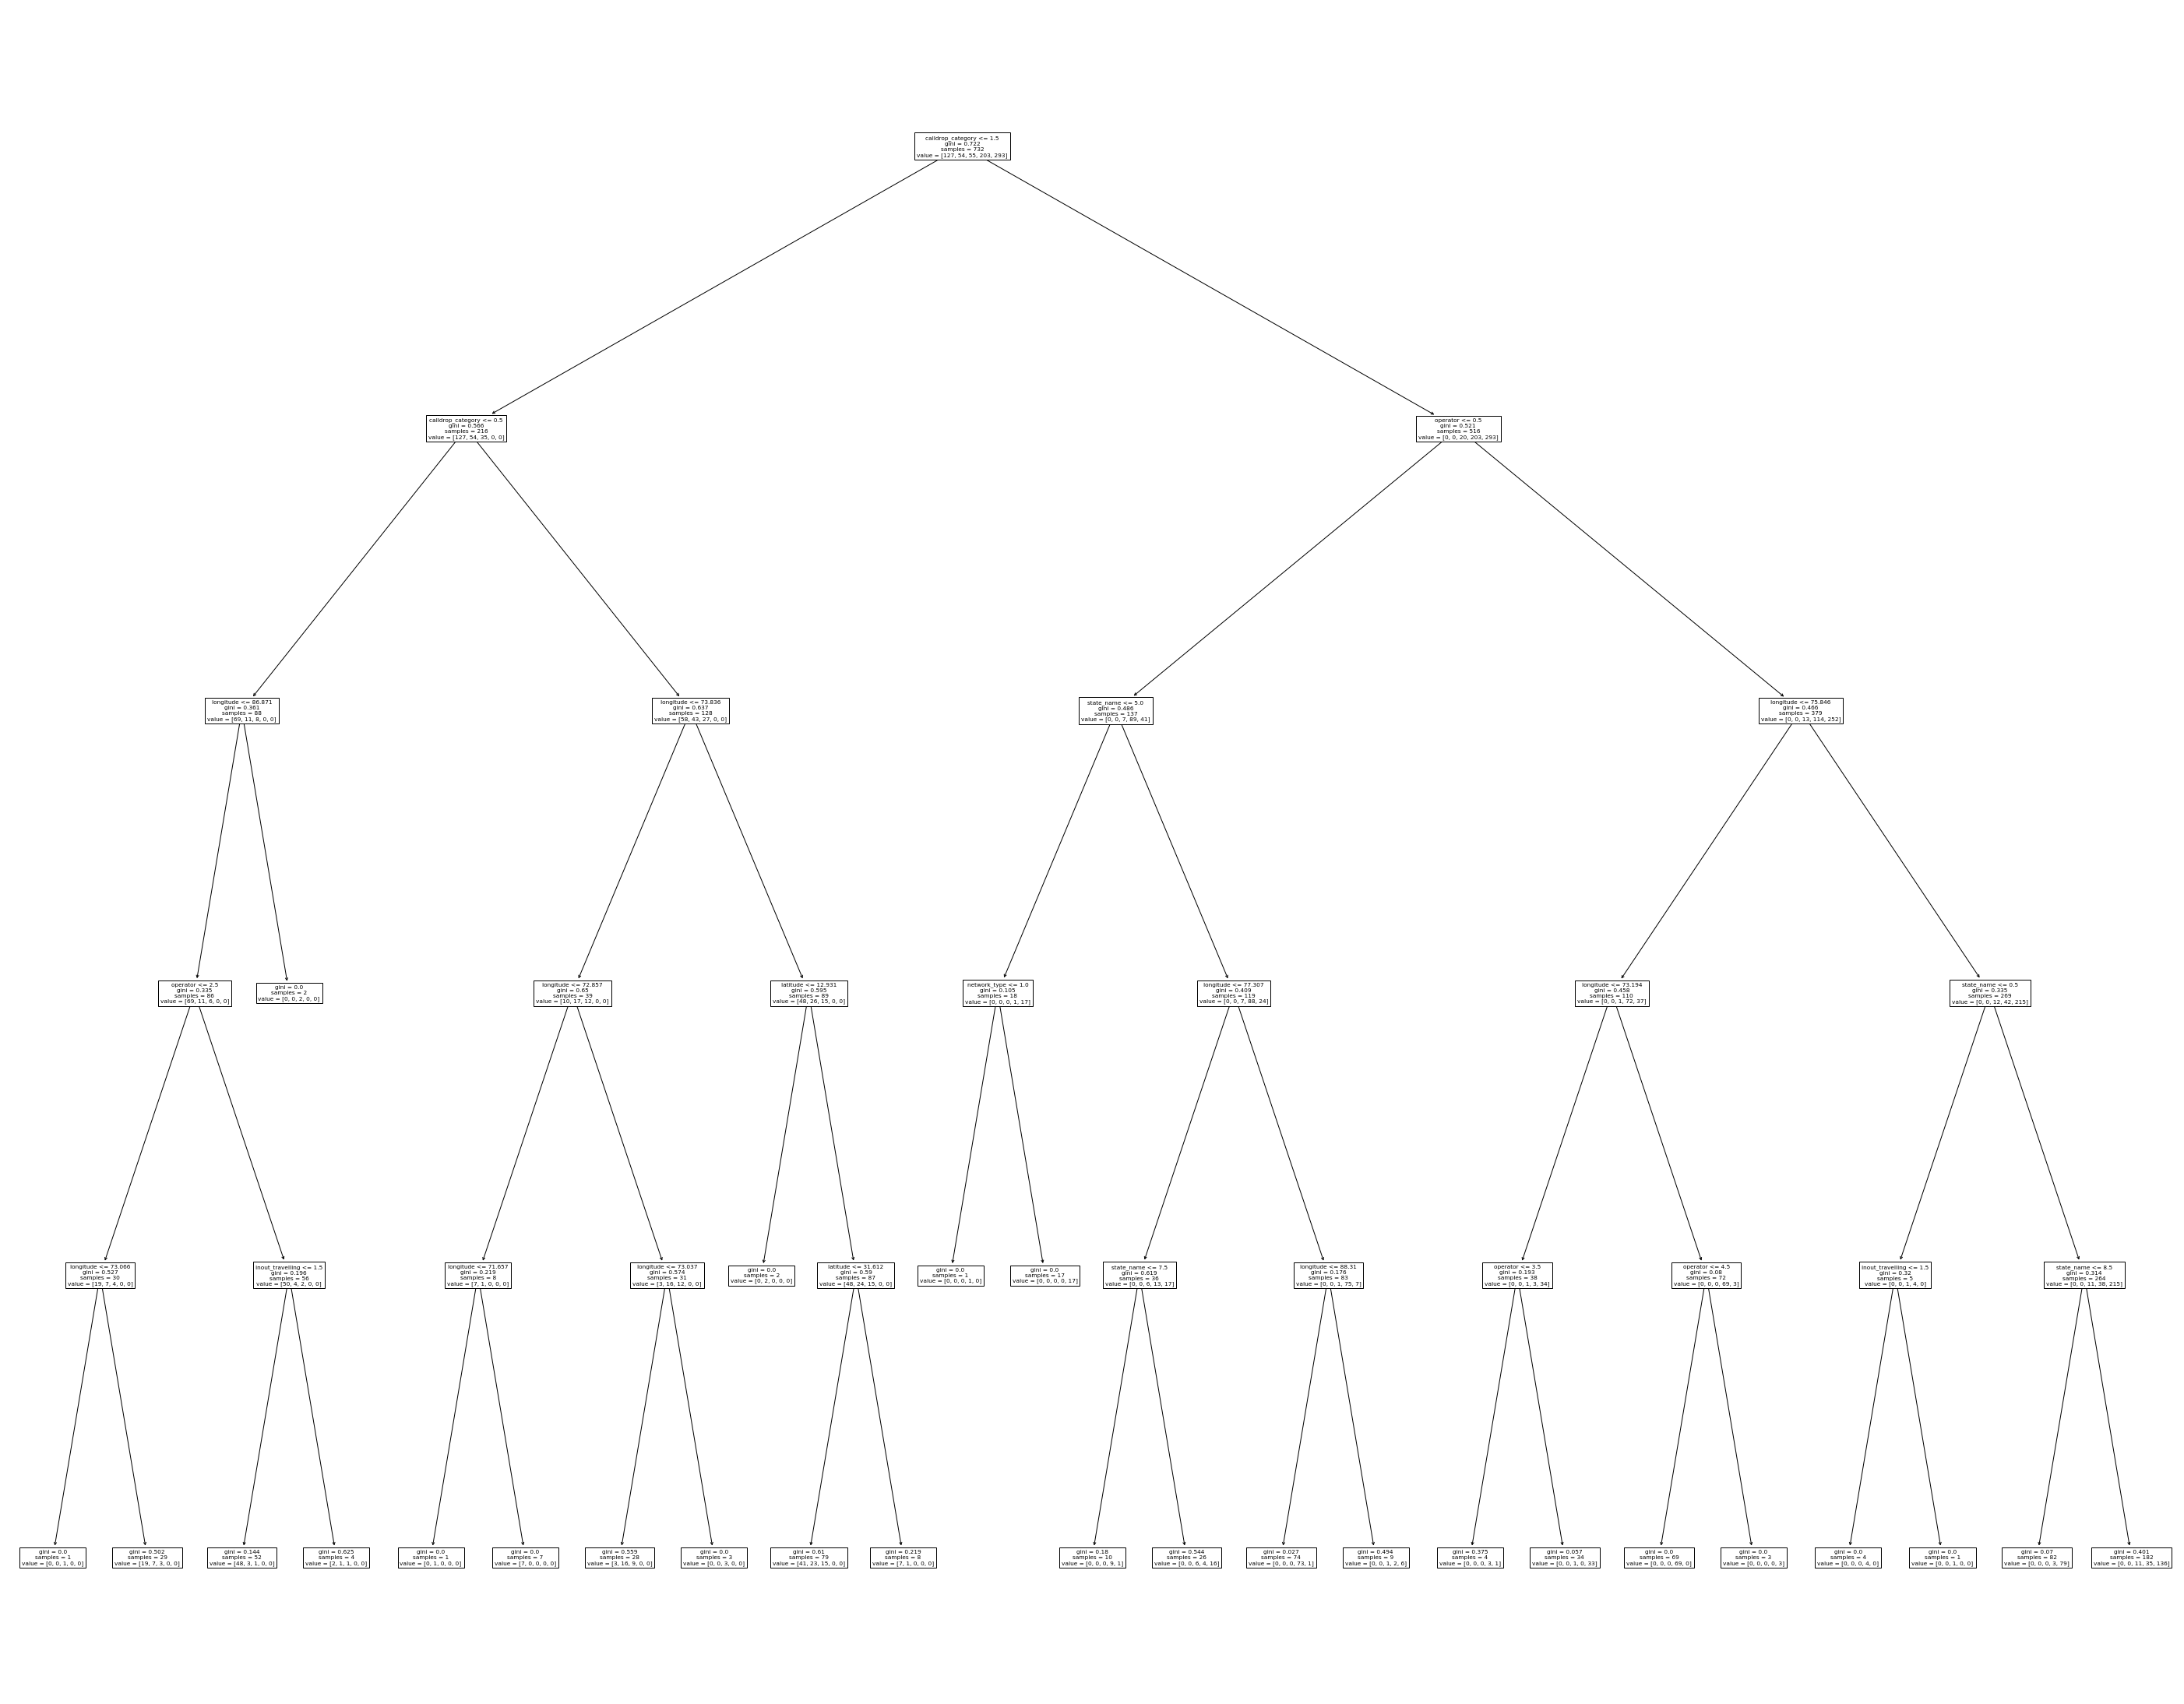

In [26]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=5)
model = dt.fit(df_X, df_Y)
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(model, 
                   feature_names=df_X.columns.values.tolist())

[0.11201216 0.00779422 0.00566247 0.43740951 0.00917784 0.33193721
 0.09600659]


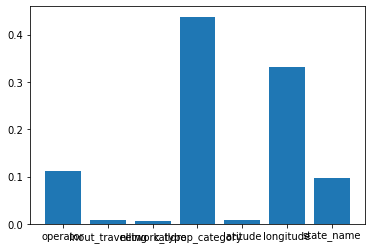

In [27]:
#
print(model.feature_importances_)
plt.bar(df_X.columns.values.tolist(), model.feature_importances_)
plt.show()

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance

From above operator, longitude, lattitude, state_name, call drop categoies are important fature

## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [28]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(dt, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(df_X, df_Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2022-02-21 15:55:47] Features: 1/5 -- score: 0.5737675892274718[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2022-02-21 15:55:47] Features: 2/5 -- score: 0.7022271922467617[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished

[2022-02-21 15:55:47] Features: 3/5 -- score: 0.7049575994781474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [29]:
sfs1.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.57823129, 0.57142857, 0.56849315, 0.57534247, 0.57534247]),
  'avg_score': 0.5737675892274718,
  'feature_names': ('calldrop_category',)},
 2: {'feature_idx': (3, 4),
  'cv_scores': array([0.67346939, 0.70068027, 0.65753425, 0.78767123, 0.69178082]),
  'avg_score': 0.7022271922467617,
  'feature_names': ('calldrop_category', 'latitude')},
 3: {'feature_idx': (0, 3, 4),
  'cv_scores': array([0.66666667, 0.71428571, 0.65753425, 0.76027397, 0.7260274 ]),
  'avg_score': 0.7049575994781474,
  'feature_names': ('operator', 'calldrop_category', 'latitude')},
 4: {'feature_idx': (0, 3, 4, 6),
  'cv_scores': array([0.69387755, 0.75510204, 0.69863014, 0.76027397, 0.75342466]),
  'avg_score': 0.7322616717920045,
  'feature_names': ('operator',
   'calldrop_category',
   'latitude',
   'state_name')},
 5: {'feature_idx': (0, 3, 4, 5, 6),
  'cv_scores': array([0.73469388, 0.69387755, 0.74657534, 0.82191781, 0.7739726 ]),
  'avg_score': 0.75420743639

Top 5 feature indexes (ACC: 0.754): (0, 3, 4, 5, 6)

('operator', 'calldrop_category', 'latitude', 'longitude', 'state_name')


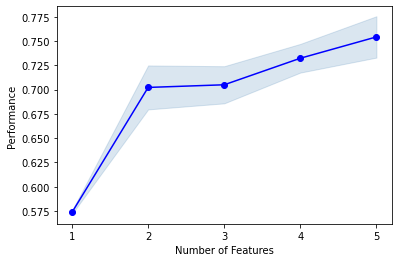

In [30]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

print('Top 5 feature indexes (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print(sfs1.k_feature_names_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');


## 5.5 Conclude the top 3 significant features with necessary justifications.

Based on feature importance concluded  from decision tree and SequentialFeatureSelector method following are top 3 features

these three fature has high important and it is calculated base on gini index. std error are observed lower in SequentialFeatureSelector menthod if these featue are included.

**'operator' 'calldrop_category', 'longitude'**